In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [47]:
path = "data/auto.csv"

In [48]:
auto_df = pd.read_csv(path, names=headers)

In [49]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Missing values in this dataset are represented by '?'. We are going to replace '?' with NaN (Not a Number) which is Python's default missing value marker

In [50]:
import numpy as np

In [51]:
auto_df.replace('?', np.nan, inplace=True)

In [52]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Now that we have converted it to Python's default missing value format, we can evaluate the data for missing values

In [53]:
missing_data = auto_df.isnull()

In [54]:
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 'True' stands for missing value whereas 'False' stands for not missing value

In [55]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

#### Based on the summary above, normalized-losses have 45 missing values and so on

#### How to deal with missing data?
#### drop data
* drop the whole row
* drop the whole column


#### replace data
* replace it by mean
* replace it by frequency
* replace it based on other functions

#### So now we are going to replace the NaN

#### Replace by mean:

* "normalized-losses": 41 missing data, replace them with mean
* "stroke": 4 missing data, replace them with mean
* "bore": 4 missing data, replace them with mean
* "horsepower": 2 missing data, replace them with mean
* "peak-rpm": 2 missing data, replace them with mean


#### Replace by frequency:

* "num-of-doors": 2 missing data, replace them with "four".
    * Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur


#### Drop the whole row:

* "price": 4 missing data, simply delete the whole row
    * Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

### Replace by mean

In [56]:
average_normalized_loss = auto_df['normalized-losses'].astype('float').mean(axis = 0)
average_normalized_loss

122.0

In [57]:
auto_df['normalized-losses'].replace(np.nan, average_normalized_loss, inplace=True)

In [58]:
auto_df[['normalized-losses']].isna().any()

normalized-losses    False
dtype: bool

In [59]:
average_bore = auto_df['bore'].astype('float').mean(axis = 0)
average_bore

3.3297512437810957

In [60]:
auto_df['bore'].replace(np.nan, average_bore, inplace=True)

In [61]:
average_stroke = auto_df['stroke'].astype('float').mean(axis = 0)
average_stroke

3.2554228855721337

In [62]:
auto_df['stroke'].replace(np.nan, average_stroke, inplace=True)

In [63]:
average_horsepower = auto_df['horsepower'].astype('float').mean(axis = 0)
average_horsepower

104.25615763546799

In [64]:
auto_df['horsepower'].replace(np.nan, average_horsepower, inplace=True)

In [65]:
average_peak_rpm = auto_df['peak-rpm'].astype('float').mean(axis = 0)
average_peak_rpm

5125.369458128079

In [66]:
auto_df['peak-rpm'].replace(np.nan, average_peak_rpm, inplace=True)

### Replace by frequency

In [67]:
auto_df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [68]:
auto_df['num-of-doors'].value_counts().idxmax() #most common type

'four'

In [69]:
auto_df['num-of-doors'].replace(np.nan, "four", inplace=True)

### Drop rows

In [70]:
auto_df.dropna(subset=['price'], axis = 0, inplace=True)

auto_df.reset_index(drop=True, inplace=True) # reset index, since we dropped some rows

In [71]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [72]:
auto_df.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

#### Now we have the dataset with no missing values

### Correct data format

#### The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

#### In Pandas,
* .dtype() to check the data type
* .astype() to change the data type

In [73]:
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [74]:
auto_df[['bore', 'stroke']] = auto_df[['bore', 'stroke']].astype('float')

In [75]:
auto_df[['normalized-losses']] = auto_df[['normalized-losses']].astype('int')

In [76]:
auto_df[['price']] = auto_df[['price']].astype('float')

In [77]:
auto_df[['peak-rpm']] = auto_df[['peak-rpm']].astype('float')

In [78]:
auto_df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### Now the dataset has been cleaned and the columns are in the proper format

### Data Standardization

#### Standardization is the process of transforming data into a common format 

#### In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard

#### We will need to apply data transformation to transform mpg into L/100km

#### L/100km = 235 / mpg

In [79]:
auto_df['city-L/100km'] = 235/auto_df['city-mpg']

In [80]:
auto_df.tail(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400.0,19,25,22625.0,12.368421


In [81]:
auto_df['highway-L/100km'] = 235/auto_df['highway-mpg']

In [82]:
auto_df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462


In [83]:
auto_df = auto_df.drop(['highway-L/100km'], axis=1)

In [84]:
auto_df['highway-mpg'] = 235/auto_df['highway-mpg']

In [85]:
auto_df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace=True)

In [86]:
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km'],
      dtype='object')

### Data Normalization

#### Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

#### Now let's scale the columns 'width', 'height', and 'length' so that their values are in the range (0,1)

In [87]:
auto_df['height'] = auto_df['height']/auto_df['height'].max()

In [88]:
auto_df['width'] = auto_df['width']/auto_df['width'].max()

In [89]:
auto_df['length'] = auto_df['length']/auto_df['length'].max()

### Binning

#### Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis

In [94]:
auto_df['horsepower'].astype(int).max()

262

In [95]:
auto_df['horsepower'].astype(int).min()

48

#### In our dataset, "horsepower" is a real valued variable ranging from 48 to 262, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)?

In [96]:
auto_df['horsepower'] = auto_df['horsepower'].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

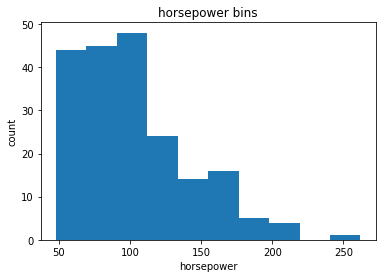

In [99]:
plt.hist(auto_df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

#### We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

#### Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]). Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]). Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.

#### We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [100]:
bins = np.linspace(min(auto_df['horsepower']), max(auto_df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [101]:
group_names = ['Low', 'Medium', 'High']

In [102]:
auto_df['horsepower-binned'] = pd.cut(auto_df['horsepower'], bins, labels=group_names, include_lowest=True)
auto_df[['horsepower', 'horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [103]:
auto_df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

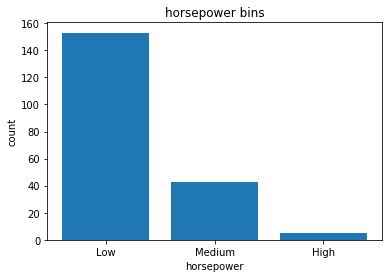

In [105]:
plt.bar(group_names, auto_df["horsepower-binned"].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

#### We successfully narrowed down the intervals from 57 to 3!

#### Normally, a histogram is used to visualize the distribution of bins we created above.

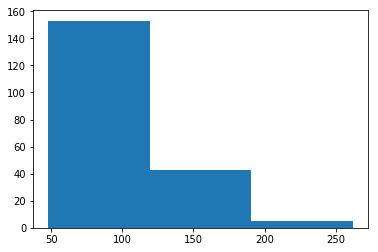

In [108]:
plt.hist(auto_df['horsepower'], bins = 3)
plt.show()

#### The plot above shows the binning result for 'horsepower'

### Indicator variable (dummy variable)

#### An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

#### Why do we use indicator variables?

#### So we can use categorical variables for regression analysis.

In [109]:
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [110]:
auto_df['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

#### We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

#### We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type.

In [111]:
dummy_variable = pd.get_dummies(auto_df['fuel-type'])
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [112]:
dummy_variable.tail()

,diesel,gas
196,0,1
197,0,1
198,0,1
199,1,0
200,0,1


In [113]:
dummy_variable.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


#### Add the columns to the 'auto' DataFrame

In [114]:
auto_df = pd.concat([auto_df, dummy_variable], axis = 1)

In [115]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [117]:
auto_df[['fuel-type', 'gas', 'diesel']].tail(15)

,fuel-type,gas,diesel
186,gas,1,0
187,gas,1,0
188,diesel,0,1
189,gas,1,0
190,gas,1,0
191,gas,1,0
192,gas,1,0
193,gas,1,0
194,gas,1,0
195,gas,1,0


In [118]:
auto_df.drop(['fuel-type'], axis=1, inplace=True)

In [119]:
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [120]:
aspiration_dummy_variable = pd.get_dummies(auto_df['aspiration'])
aspiration_dummy_variable.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [121]:
aspiration_dummy_variable.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
aspiration_dummy_variable.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [122]:
auto_df = pd.concat([auto_df, aspiration_dummy_variable], axis=1)
auto_df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [123]:
auto_df.drop(['aspiration'], axis=1, inplace=True)

In [124]:
auto_df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [126]:
auto_df.to_csv('data/auto_df_cleaned.csv')